### Import Functions

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

### Read CWatM simulation results

In [2]:
output_folder = r"C:/CWatM_output_Examples/CWatM_output_July5"
#output_folder2 = r"C:\CWatM_output_0624"

In [3]:
# variables of interest 
variables = ['discharge', 'lakeResInflowDis', 
             'act_bigLakeResAbst_alloc',  'act_bigLakeResAbst','lakeResOutflowDis',
             'lakeResStorage','act_LocalLakeAbstractM3','EvapWaterBodyM','CellArea','leakage','act_indWithdrawal']

In [5]:
# 1995/06/01 - 2004/05/31
file_path = {}
file = {}
for i in range(11): 
    file_path[i] = output_folder + "/" + variables[i] + "_" + "daily.nc"
    file[i] = xr.open_dataarray(file_path[i],decode_times=False)
    reference_date = '2005-04-20'
    file[i]['time'] = pd.date_range(start=reference_date, periods=file[i].sizes['time'], freq='D')
"""
# 2004/06/01 - 2015/06/01
file_path2 = {}
file2 = {}
for i in range(10): 
    file_path2[i] = output_folder2 + "/" + variables[i] + "_" + "daily.nc"
    file2[i] = xr.open_dataarray(file_path2[i])
"""

'\n# 2004/06/01 - 2015/06/01\nfile_path2 = {}\nfile2 = {}\nfor i in range(10): \n    file_path2[i] = output_folder2 + "/" + variables[i] + "_" + "daily.nc"\n    file2[i] = xr.open_dataarray(file_path2[i])\n'

### River Gauges

In [6]:
Sarati = (17.91138889, 75.0075)
Wadakbal = (17.53416667, 75.88)
Takli = (17.41305556, 75.84777778)
Daund = (18.47944444, 74.57527778)
Bhima = (17.3875, 75.89583) 
Koregaon = (18.6439,74.0542)
Khamgoan = (18.545,74.21861111)
Pandarpur = (17.69083333, 75.32666667)

### Functions

In [7]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

In [8]:
def ms(da,lat_id,lon_id):
    year_month_idx = pd.MultiIndex.from_arrays([da['time.year'], da['time.month']])
    da.coords['year_month'] = ('time', year_month_idx)
    monthlysum = da[:,lat_id,lon_id].groupby('year_month').sum(...) 
    return monthlysum 

In [9]:
def ds(da,lat_id,lon_id):
    year_month_idx = pd.MultiIndex.from_arrays([da['time.year'], da['time.month']])
    da.coords['year_month'] = ('time', year_month_idx)
    dailysum = da[:,lat_id,lon_id].groupby('time').sum(...) 
    return dailysum 

In [10]:
def ys(da,lat_id,lon_id):
    year_month_idx = pd.MultiIndex.from_arrays([da['time.year'], da['time.month']])
    da.coords['year_month'] = ('time', year_month_idx)
    yearlysum = da[:,lat_id,lon_id].groupby('time.year').sum(...) 
    return yearlysum 

### discharge

In [12]:
da=file[0]

### Sarati

In [13]:
outlet = Sarati

lats = da['lat'][:]
lons = da['lon'][:]

in_lat = outlet[0]
in_lon = outlet[1]

lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

In [20]:
sarati_csv = r"C:\Users\mikha\Box\FUSE_Modeling_Team\2-PUNE_INDIA\2.2-DATA\2.2.1-SPATIAL_DATA\PROCESSING\River_Discharge\DailyData/Sarati_DailyDischarge_CWC.xlsx"

In [21]:
sarati_pd = pd.read_excel(sarati_csv)

In [22]:
sarati_pd['year'] = pd.DatetimeIndex(sarati_pd['Unnamed: 0']).year

In [23]:
sarati_year = sarati_pd["Discharge[m^3/s]:Instantaneous"].groupby(sarati_pd['year']).sum()*3600*24*1e-6

In [24]:
sarati_pd['month'] = pd.DatetimeIndex(sarati_pd['Unnamed: 0']).month

In [25]:
sarati_month = sarati_pd["Discharge[m^3/s]:Instantaneous"].groupby([sarati_pd['year'],sarati_pd['month']]).sum().reset_index()

ValueError: x and y must have same first dimension, but have shapes (6361,) and (2598,)

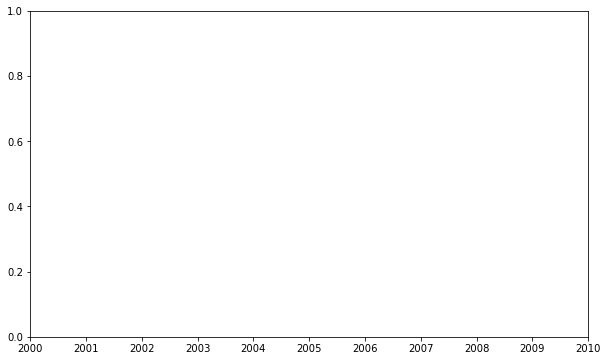

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.plot(sarati_pd['Unnamed: 0'][1:],ds(da_combine_dis,lat_idx,lon_idx)[:-365*2-1],color='blue',label='CWatM simulation')
plt.plot(sarati_pd['Unnamed: 0'][1:],ds(da,lat_idx,lon_idx)[:-365*2-1],color='blue',label='CWatM simulation')

plt.plot(sarati_pd['Unnamed: 0'][1:],sarati_pd['Discharge[m^3/s]:Instantaneous'][1:],color='red',label='flow gauged at CWC station')

plt.title("Sarati discharge per day (m3/s)")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Sarati_daily.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(ms(da_combine_dis, lat_idx, lon_idx),color='blue',label='CWatM simulation')
plt.plot(sarati_month['Discharge[m^3/s]:Instantaneous'],color='red',label='flow gauged at CWC station')
plt.title("Sarati discharge m3/s")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.xlim([0,208])
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Sarati_monthly.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.arange(1996,2016), ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6,color='blue',label='CWatM simulation data')
plt.plot(sarati_year,color='red',label='flow gauged at CWC station')
y_mean = [np.mean(ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6)]*20
mean_line = ax.plot(np.arange(1996,2016),y_mean, label='CWatM Mean', linestyle='--',color='blue')

y_mean_1 = [np.mean(sarati_year)]*17
mean_line_1 = ax.plot(np.arange(1996,2013),y_mean_1, label='CWC Mean', linestyle='--',color='red')

plt.title("Sarati discharge volume per year")
plt.xlabel("Year")
plt.ylabel("Mcums")
plt.xlim([1996,2012])
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Sarati_yearly.png')

### Error Statistics

In [ ]:
sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - sarati_month['Discharge[m^3/s]:Instantaneous'])/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

In [ ]:
sum(abs(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - sarati_month['Discharge[m^3/s]:Instantaneous']))/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

### Wadakbal

In [ ]:
outlet = Wadakbal

lats = da['lat'][:]
lons = da['lon'][:]

in_lat = outlet[0]
in_lon = outlet[1]

lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

In [ ]:
Wadakbal_csv = r"C:\Users\mikha\Box\FUSE_Modeling_Team\2-PUNE_INDIA\2.2-DATA\2.2.1-SPATIAL_DATA\PROCESSING\River_Discharge\DailyData/Wadakba_DailyDischarge_CWC.xlsx"

In [ ]:
Wadakbal_pd = pd.read_excel(Wadakbal_csv)

In [ ]:
Wadakbal_pd['year'] = pd.DatetimeIndex(Wadakbal_pd['Unnamed: 0']).year

In [ ]:
Wadakbal_year = Wadakbal_pd["Discharge[m^3/s]:Instantaneous"].groupby(Wadakbal_pd['year']).sum()*3600*24*1e-6

In [ ]:
Wadakbal_pd['month'] = pd.DatetimeIndex(Wadakbal_pd['Unnamed: 0']).month

In [ ]:
Wadakbal_month = Wadakbal_pd["Discharge[m^3/s]:Instantaneous"].groupby([Wadakbal_pd['year'],Wadakbal_pd['month']]).sum().reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(Wadakbal_pd['Unnamed: 0'][1:],ds(da_combine_dis,lat_idx,lon_idx)[:-8-365*2],color='blue',label='CWatM simulation')
plt.plot(Wadakbal_pd['Unnamed: 0'][1:],Wadakbal_pd['Discharge[m^3/s]:Instantaneous'][1:],color='red',label='flow gauged at CWC station')

plt.title("Wadakbal discharge per day (m3/s)")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Wadakbal_daily.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(ms(da_combine_dis, lat_idx, lon_idx),color='blue',label='CWatM simulation')
plt.plot(Wadakbal_month['Discharge[m^3/s]:Instantaneous'],color='red',label='flow gauged at CWC station')
plt.title("Wadakbal discharge m3/s")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.xlim([0,208])
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Wadakbal_monthly.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.arange(1996,2016), ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6,color='blue',label='CWatM simulation data')
plt.plot(Wadakbal_year,color='red',label='flow gauged at CWC station')
y_mean = [np.mean(ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6)]*20
mean_line = ax.plot(np.arange(1996,2016),y_mean, label='CWatM Mean', linestyle='--',color='blue')

y_mean_1 = [np.mean(Wadakbal_year)]*17
mean_line_1 = ax.plot(np.arange(1996,2013),y_mean_1, label='CWC Mean', linestyle='--',color='red')

plt.title("Wadakbal discharge volume per year")
plt.xlabel("Year")
plt.ylabel("Mcums")
plt.xlim([1996,2012])
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Wadakbal_yearly.png')

In [ ]:
sum(abs(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - Wadakbal_month['Discharge[m^3/s]:Instantaneous']))/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

In [ ]:
sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - Wadakbal_month['Discharge[m^3/s]:Instantaneous'])/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

### Takli

In [ ]:
outlet = Takli

lats = da['lat'][:]
lons = da['lon'][:]

in_lat = outlet[0]
in_lon = outlet[1]

lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

In [ ]:
Takli_csv = r"C:\Users\mikha\Box\FUSE_Modeling_Team\2-PUNE_INDIA\2.2-DATA\2.2.1-SPATIAL_DATA\PROCESSING\River_Discharge\DailyData/Takli_DailyDischarge_CWC.xlsx"

In [ ]:
Takli_pd = pd.read_excel(Takli_csv)

In [ ]:
Takli_pd['year'] = pd.DatetimeIndex(Takli_pd['Unnamed: 0']).year

In [ ]:
Takli_year = Takli_pd["Discharge[m^3/s]:Instantaneous"].groupby(Takli_pd['year']).sum()*3600*24*1e-6

In [ ]:
Takli_pd['month'] = pd.DatetimeIndex(Takli_pd['Unnamed: 0']).month

In [ ]:
Takli_month = Takli_pd["Discharge[m^3/s]:Instantaneous"].groupby([Takli_pd['year'],Takli_pd['month']]).sum().reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(Takli_pd['Unnamed: 0'][1:],ds(da_combine_dis,lat_idx,lon_idx)[:-365*2-1],color='blue',label='CWatM simulation')
plt.plot(Takli_pd['Unnamed: 0'][1:],Takli_pd['Discharge[m^3/s]:Instantaneous'][1:],color='red',label='flow gauged at CWC station')
plt.title("Takli discharge per day (m3/s)")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Takli_daily.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(ms(da_combine_dis, lat_idx, lon_idx),color='blue',label='CWatM simulation')
plt.plot(Takli_month['Discharge[m^3/s]:Instantaneous'],color='red',label='flow gauged at CWC station')
plt.title("Takli discharge m3/s")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.xlim([0,208])
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Takli_monthly.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.arange(1996,2016), ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6,color='blue',label='CWatM simulation ')
plt.plot(Takli_year,color='red',label='flow gauged at CWC station')
y_mean = [np.mean(ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6)]*20
mean_line = ax.plot(np.arange(1996,2016),y_mean, label='CWatM Mean', linestyle='--',color='blue')

y_mean_1 = [np.mean(Takli_year)]*17
mean_line_1 = ax.plot(np.arange(1996,2013),y_mean_1, label='CWC Mean', linestyle='--',color='red')

plt.title("Takli discharge volume per year")
plt.xlabel("Year")
plt.ylabel("Mcums")
plt.xlim([1996,2012])
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Takli_yearly.png')

In [ ]:
sum(abs(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - Takli_month['Discharge[m^3/s]:Instantaneous']))/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

In [ ]:
sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209] - Takli_month['Discharge[m^3/s]:Instantaneous'])/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:209])

### Khamgoan

In [ ]:
outlet = Khamgoan

lats = da['lat'][:]
lons = da['lon'][:]

in_lat = outlet[0]
in_lon = outlet[1]

lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

In [ ]:
Khamgoan_csv = r"C:\Users\mikha\Box\FUSE_Modeling_Team\2-PUNE_INDIA\2.2-DATA\2.2.1-SPATIAL_DATA\PROCESSING\River_Discharge\DailyData/Khamgaon_DailyDischarge_State.xlsx"

In [ ]:
Khamgoan_pd = pd.read_excel(Khamgoan_csv)

In [ ]:
Khamgoan_pd['year'] = pd.DatetimeIndex(Khamgoan_pd['Unnamed: 0']).year

In [ ]:
Khamgoan_year = Khamgoan_pd["Discharge[m^3/s]:Instantaneous"].groupby(Khamgoan_pd['year']).sum()*3600*24*1e-6

In [ ]:
Khamgoan_pd['month'] = pd.DatetimeIndex(Khamgoan_pd['Unnamed: 0']).month

In [ ]:
Khamgoan_month = Khamgoan_pd["Discharge[m^3/s]:Instantaneous"].groupby([Khamgoan_pd['year'],Khamgoan_pd['month']]).sum().reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(Khamgoan_pd['Unnamed: 0'][3867:],Khamgoan_pd['Discharge[m^3/s]:Instantaneous'][3867:],color='red',label='flow gauged at CWC station')
plt.plot(Khamgoan_pd['Unnamed: 0'][3867:],ds(da_combine_dis,lat_idx,lon_idx)[:-365*2-1248],color='blue',label='CWatM simulation')

plt.title("Khamgoan discharge per day (m3/s)")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Khamgoan_daily.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(ms(da_combine_dis, lat_idx, lon_idx),color='blue',label='CWatM simulation')
plt.plot(np.arange(168),Khamgoan_month['Discharge[m^3/s]:Instantaneous'][127:],color='red',label='flow gauged at CWC station')
plt.title("Khamgoan discharge m3/s")
plt.xlabel("Time")
plt.ylabel("m3/s")
plt.xlim([0,168])
plt.legend(prop={'size': 20})
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Khamgoan_monthly.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.arange(1996,2016), ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6,color='blue',label='CWatM simulation data')
plt.plot(Khamgoan_year[12:],color='red',label='flow gauged at CWC station')
y_mean = [np.mean(ys(da_combine_dis, lat_idx, lon_idx)*3600*24*1e-6)]*20
mean_line = ax.plot(np.arange(1996,2016),y_mean, label='CWatM Mean', linestyle='--',color='blue')

y_mean_1 = [np.mean(Khamgoan_year[12:])]*14
mean_line_1 = ax.plot(np.arange(1996,2010),y_mean_1, label='CWC Mean', linestyle='--',color='red')

plt.title("Khamgoan discharge volume per year")
plt.xlabel("Year")
plt.ylabel("Mcums")
plt.xlim([1996,2009])
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.tight_layout()
plt.savefig('Khamgoan_yearly.png')

In [ ]:
sum(abs(ms(da_combine_dis, lat_idx, lon_idx)[0:168] - Khamgoan_month['Discharge[m^3/s]:Instantaneous'][127:]))/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:168])

In [ ]:
sum(ms(da_combine_dis, lat_idx, lon_idx)[0:168] - Khamgoan_month['Discharge[m^3/s]:Instantaneous'][127:])/sum(ms(da_combine_dis, lat_idx, lon_idx)[0:168])